### 构造神经网络模型对两条曲线数据点进行二分类，详细信息参考博客
https://huizhuzhao.github.io/2017/01/16/neural-networks-manifolds-topology.html

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, CSVLogger


In [32]:
def one_hot(index, dim):
    index = np.asarray(index, dtype=np.int32)
    I = np.eye(dim)
    res = I[index]
    return res

def dataset(n_samples, n_repeat=1):
    x1 = np.random.uniform(-1., 1., size=(n_samples, 1))
    y1 = x1**2
    
    x2 = np.random.uniform(-1., 1., size=(n_samples, 1))
    y2 = x2**2 + 0.2
    
    X_1 = np.concatenate([x1, y1], axis=1)
    X_2 = np.concatenate([x2, y2], axis=1)
    y_1 = one_hot(np.zeros(shape=(n_samples,)), 2)
    y_2 = one_hot(np.ones(shape=(n_samples,)), 2)
    
    X = np.concatenate([X_1, X_2], axis=0)
    y = np.concatenate([y_1, y_2], axis=0)
    X = np.tile(X, (n_repeat, 1))
    y = np.tile(y, (n_repeat, 1))
    
    return X, y

def build_model():
    model = Sequential()
    model.add(Dense(units=13, input_shape=(2, ), activation='relu')) # changing output_dim, you test different model
    model.add(Dense(output_dim=3, activation='relu'))
    model.add(Dense(units=2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def get_callbacks():
    logger = CSVLogger('./logger.csv', append=False)
    hdf5_path = './weights.{epoch:02d}-{val_loss:.2f}.hdf5'
    checkpoint = ModelCheckpoint(hdf5_path, monitor='val_loss', save_best_only=True, verbose=1)
    return [logger, checkpoint]

In [35]:
train_X, train_y = dataset(1000, 100)
valid_X, valid_y = dataset(1000)
callbacks = get_callbacks()
model = build_model()
model.fit(train_X, train_y, epochs=20, batch_size=32, validation_data=(valid_X, valid_y), callbacks=callbacks)

/home/huizhu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3, activation="relu")`


Train on 200000 samples, validate on 2000 samples
Epoch 1/20
200000/200000 [==============================] - 8s - loss: 0.1367 - acc: 0.9659 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 2/20
200000/200000 [==============================] - 8s - loss: 9.1253e-04 - acc: 1.0000 - val_loss: 1.0425e-04 - val_acc: 1.0000
Epoch 3/20
200000/200000 [==============================] - 8s - loss: 2.9651e-05 - acc: 1.0000 - val_loss: 3.9705e-06 - val_acc: 1.0000
Epoch 4/20
200000/200000 [==============================] - 8s - loss: 1.1698e-06 - acc: 1.0000 - val_loss: 2.3255e-07 - val_acc: 1.0000
Epoch 5/20
200000/200000 [==============================] - 8s - loss: 1.4439e-07 - acc: 1.0000 - val_loss: 1.2085e-07 - val_acc: 1.0000
Epoch 6/20
200000/200000 [==============================] - 8s - loss: 1.1926e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/20
200000/200000 [==============================] - 9s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000

In [36]:
train_X.shape, train_y.shape

((200000, 2), (200000, 2))

((100, 100), (100, 100))
(10000, 2)
(100, 100)


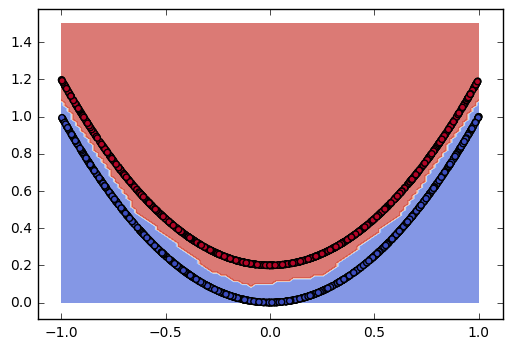

In [37]:
def visualize_model(model, x_min, x_max, y_min, y_max, h):
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, h), np.linspace(y_min, y_max, h))
    print(xx.shape, yy.shape)
    zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
    print(zz.shape)
    zz = np.reshape(zz.argmax(axis=1), xx.shape)
    print(zz.shape)
    
    
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.7)
    plt.scatter(valid_X[:, 0], valid_X[:, 1], c=valid_y.argmax(axis=1), cmap=plt.cm.coolwarm)
    plt.show()
   
visualize_model(model, -1., 1., 0., 1.5, 100)

In [38]:
csv_path = './logger.csv'
df = pd.read_csv(csv_path)
df.shape

(20, 5)

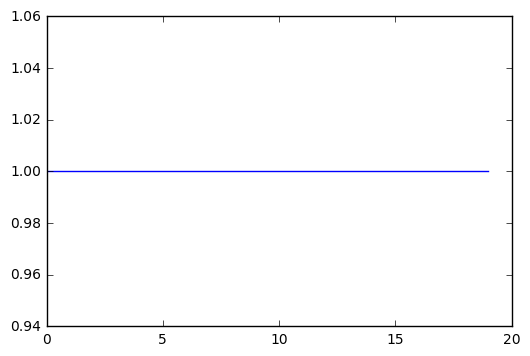

In [39]:
plt.plot(df.epoch, df.val_acc)
plt.show()